In [64]:
import os, sys, torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('../../../modules'))
sys.path.append(os.path.abspath('../../../modules/celeba_glasses'))
import vae_train as vt
import vae_ortho as vo
import vae_surgery as vs
import vae_os as vos
import vae_ascent as va
import vae_ad as vad
import classifier as cl
import batch as bt
import utility as ut
import datapipe as dp
import vae_viz as viz
from vae import VAE
import torchvision as tv


device = ut.get_device()
root = '../../../data/CelebA/glasses'
celeba_folder = '../../../data/CelebA'
params = {
    "model": f"{celeba_folder}/vae/vae_200.pth",
    "latent_dim": 512,
    "num_steps": 50,
    "batch_size": 128,
    "log_interval": 1,
    "collect_interval": "epoch",
    "save_steps": "epoch",
    "all_classes": [0, 1],
    "forget_class": 1,
    "classifier_path": f"{celeba_folder}/cnn/cnn_10.pth",
    "kl_weight": 1,
    "total_duration": None,
    "data_path": f'{celeba_folder}/dataset',
    "max_data": None
}

cls = cl.get_classifier(f'{celeba_folder}/cnn-glasses/cnn_100.pth', 'mps')
algorithms = {"folders": [], "labels": [],}

# algorithms["folders"].append(f"{root}/vae-a")
# algorithms["labels"].append("A")

# algorithms["folders"].append(f"{root}/vae-ad")
# algorithms["labels"].append("AD")

# algorithms["folders"].append(f"{root}/vae-hat")
# algorithms["labels"].append(r"$\hat{.}$")

algorithms["folders"].append(f"{root}/vae-s")
algorithms["labels"].append("S")

# algorithms["folders"].append(f"{root}/vae-shat")
# algorithms["labels"].append(r"$\hat{S}$")

algorithms["folders"].append(f"{root}/vae-o")
algorithms["labels"].append(r"UNO")

# algorithms["folders"].append(f"{root}/vae-ohat")
# algorithms["labels"].append(r"$\hat{O}$")

algorithms["folders"].append(f"{root}/vae-os")
algorithms["labels"].append(r"UNO-S")

# algorithms["folders"].append(f"{root}/vae-ohatshat")
# algorithms["labels"].append(r"$\hat{O}\hat{S}$")

bc = bt.BatchCompare(algorithms["folders"], algorithms["labels"])
# bc.plot("8 Fraction", "3 Fraction")
# bc.plot2(logs=[True, False], rank=True)
# plt.savefig("../../plots/glasses.pdf", bbox_inches="tight")

**Find faces with glasses in the dataset**

tensor(10., device='mps:0')


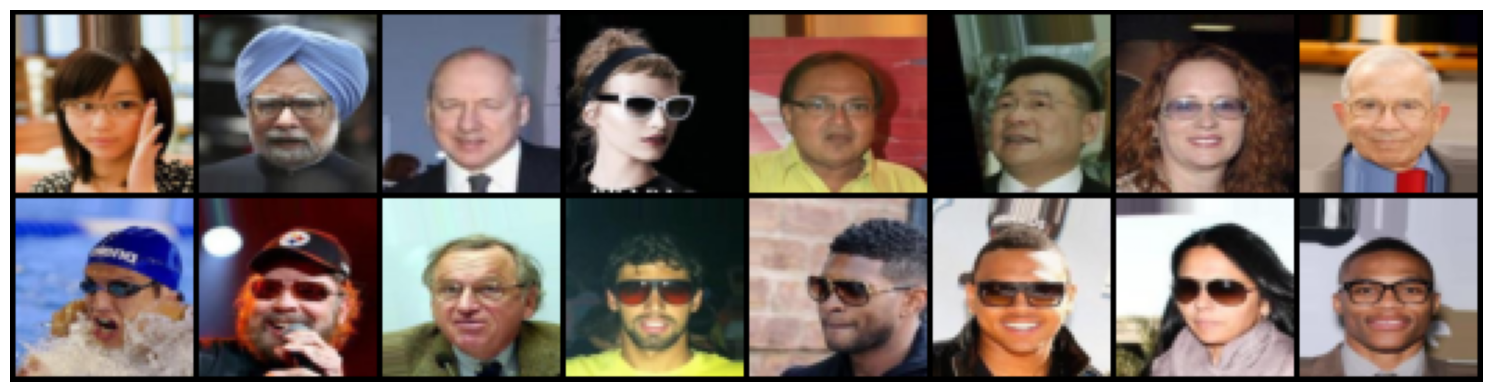

In [65]:
data = dp.CelebAAttrSameData(img_path=f'{celeba_folder}/dataset', attr_path=f'{celeba_folder}/dataset/list_attr_celeba.csv')
dataloader = data.get_dataloader(batch_size=16)
img = next(iter(dataloader))[0].to(device)
logits = cls(img)
grid = tv.utils.make_grid(img) 
plt.figure(figsize=(19, 19))
plt.imshow(grid.cpu().permute(1, 2, 0))
plt.axis("off")
print((torch.sigmoid(logits)>0.5).float().sum())

**Look at reconstructions of the original model**

(-0.5, 529.5, 133.5, -0.5)

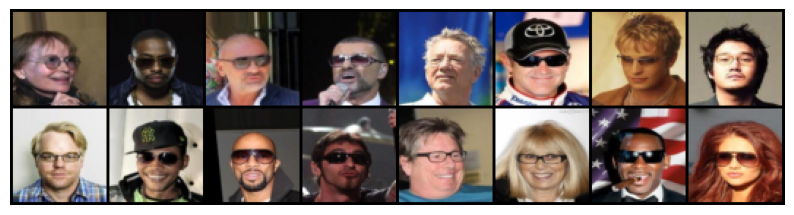

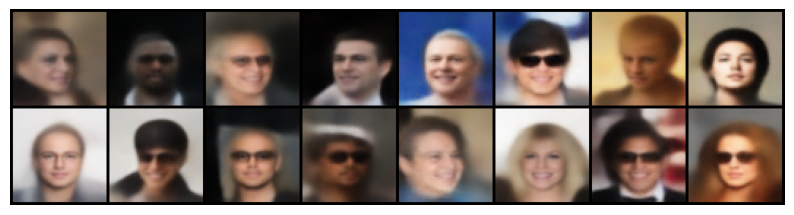

In [28]:
path = f"{celeba_folder}/vae/vae_200.pth"
model0 = vt.init_model(path, 512, 'mps')
img = next(iter(dataloader))[0].to(device)
reconstructed, _, _ = model0(img)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(tv.utils.make_grid(img.cpu()).permute(1, 2, 0))
ax.axis("off")

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(tv.utils.make_grid(reconstructed.cpu()).permute(1, 2, 0))
ax.axis("off")

**Transformation**

In [2]:
path_a = f'{celeba_folder}/vae/vae_200.pth'
path_b = f'{root}/vae-o/expr-0/checkpoints/vae_epoch_1.pth'
model_a = vt.init_model(path_a, 512, 'mps')
model_b = vt.init_model(path_b, 512, 'mps')
# fig, _ = viz.compare_model_outputs(model_a, model_b, num_samples=100, save_path=f'{root}/vae-o/expr-0/noise_3.npy')
# fig.savefig("../../plots/temp/celeba_large_gen.pdf", bbox_inches="tight")

In [11]:
print(device)

mps


**Create transformation plot**